In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key
from datetime import datetime
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify thenearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm the sufficient count
len(cities)

612

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

NameError: name 'city_url' is not defined

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval        ")
print("--------------------------------")

# Create Counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | aripuana
Processing Record 7 of Set 1 | half moon bay
Processing Record 8 of Set 1 | sangueya
Processing Record 9 of Set 1 | flinders
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | yulara
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | camacupa
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | maceio
Processing Record 17 of Set 1 | saldanha
Processing Record 18 of Set 1 | nioro
Processing Record 19 of Set 1 | tenenkou
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | auki
Processing Re

Processing Record 37 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 38 of Set 4 | kattivakkam
Processing Record 39 of Set 4 | tripoli
Processing Record 40 of Set 4 | wabash
Processing Record 41 of Set 4 | tigil
Processing Record 42 of Set 4 | teya
Processing Record 43 of Set 4 | talnakh
Processing Record 44 of Set 4 | mecca
Processing Record 45 of Set 4 | avarua
Processing Record 46 of Set 4 | tifton
Processing Record 47 of Set 4 | cayenne
Processing Record 48 of Set 4 | grand gaube
Processing Record 49 of Set 4 | saint george
Processing Record 50 of Set 4 | thompson
Processing Record 1 of Set 5 | torbay
Processing Record 2 of Set 5 | hilo
Processing Record 3 of Set 5 | oranjestad
Processing Record 4 of Set 5 | longlac
City not found. Skipping...
Processing Record 5 of Set 5 | hovd
Processing Record 6 of Set 5 | banyumas
Processing Record 7 of Set 5 | khatanga
Processing Record 8 of Set 5 | bacuit
City not found. Skipping...
Processing Record 9 of Set 5 | wainga

Processing Record 23 of Set 8 | mersing
Processing Record 24 of Set 8 | terrace
Processing Record 25 of Set 8 | khasan
Processing Record 26 of Set 8 | zolotinka
City not found. Skipping...
Processing Record 27 of Set 8 | karaton
Processing Record 28 of Set 8 | rocha
Processing Record 29 of Set 8 | constantine
Processing Record 30 of Set 8 | balikpapan
Processing Record 31 of Set 8 | kalemie
Processing Record 32 of Set 8 | kalispell
Processing Record 33 of Set 8 | greece
Processing Record 34 of Set 8 | oeiras do para
Processing Record 35 of Set 8 | bosaso
Processing Record 36 of Set 8 | nelson bay
Processing Record 37 of Set 8 | lerwick
Processing Record 38 of Set 8 | kouroussa
Processing Record 39 of Set 8 | coquimbo
Processing Record 40 of Set 8 | tezu
Processing Record 41 of Set 8 | muros
Processing Record 42 of Set 8 | quatre cocos
Processing Record 43 of Set 8 | opuwo
Processing Record 44 of Set 8 | trussville
Processing Record 45 of Set 8 | broken hill
Processing Record 46 of Set 

Processing Record 11 of Set 12 | malindi
Processing Record 12 of Set 12 | clyde river
Processing Record 13 of Set 12 | kipushi
Processing Record 14 of Set 12 | yabassi
Processing Record 15 of Set 12 | russell
Processing Record 16 of Set 12 | kremnica
Processing Record 17 of Set 12 | huittinen
Processing Record 18 of Set 12 | khandyga
Processing Record 19 of Set 12 | evanston
Processing Record 20 of Set 12 | toyos
Processing Record 21 of Set 12 | burica
City not found. Skipping...
Processing Record 22 of Set 12 | ginir
Processing Record 23 of Set 12 | sorland
Processing Record 24 of Set 12 | victoria
Processing Record 25 of Set 12 | japura
Processing Record 26 of Set 12 | aasiaat
Processing Record 27 of Set 12 | izhmorskiy
Processing Record 28 of Set 12 | batagay-alyta
Processing Record 29 of Set 12 | coronado
Processing Record 30 of Set 12 | malwan
City not found. Skipping...
Processing Record 31 of Set 12 | sao joao da barra
Processing Record 32 of Set 12 | ridgecrest
Processing Recor

In [9]:
# Convert th array of dictionaries to a Pandas dataframe.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.94,74,74,7.94,PF,2021-04-15 20:22:46
1,Hobart,-42.8794,147.3294,42.80,75,20,6.91,AU,2021-04-15 20:19:11
2,Jamestown,42.0970,-79.2353,44.01,56,90,13.80,US,2021-04-15 20:18:42
3,Mahebourg,-20.4081,57.7000,77.00,94,75,5.75,MU,2021-04-15 20:22:25
4,Aripuana,-9.1667,-60.6333,80.96,90,95,0.85,BR,2021-04-15 20:19:43
5,Half Moon Bay,37.4636,-122.4286,66.99,71,1,8.05,US,2021-04-15 20:22:46
6,Sangueya,10.7000,-14.3667,79.32,73,39,3.74,GN,2021-04-15 20:22:47
7,Flinders,-34.5833,150.8552,55.99,62,43,4.61,AU,2021-04-15 20:22:47
8,Hamilton,39.1834,-84.5333,55.40,41,75,11.50,US,2021-04-15 20:22:07
9,Yulara,-25.2406,130.9889,60.80,88,75,5.75,AU,2021-04-15 20:22:47


In [10]:
# reorder columns in DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-04-15 20:22:46,-23.1203,-134.9692,77.94,74,74,7.94
1,Hobart,AU,2021-04-15 20:19:11,-42.8794,147.3294,42.80,75,20,6.91
2,Jamestown,US,2021-04-15 20:18:42,42.0970,-79.2353,44.01,56,90,13.80
3,Mahebourg,MU,2021-04-15 20:22:25,-20.4081,57.7000,77.00,94,75,5.75
4,Aripuana,BR,2021-04-15 20:19:43,-9.1667,-60.6333,80.96,90,95,0.85
5,Half Moon Bay,US,2021-04-15 20:22:46,37.4636,-122.4286,66.99,71,1,8.05
6,Sangueya,GN,2021-04-15 20:22:47,10.7000,-14.3667,79.32,73,39,3.74
7,Flinders,AU,2021-04-15 20:22:47,-34.5833,150.8552,55.99,62,43,4.61
8,Hamilton,US,2021-04-15 20:22:07,39.1834,-84.5333,55.40,41,75,11.50
9,Yulara,AU,2021-04-15 20:22:47,-25.2406,130.9889,60.80,88,75,5.75


In [11]:
# Create the ouput file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")  #also changes inex column to City_ID instead of blank

In [12]:
# Extract relevant fileds fromt he DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

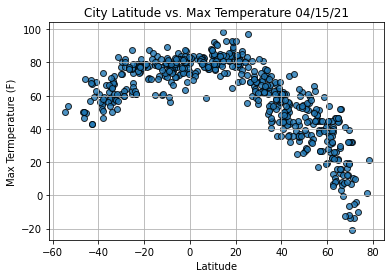

In [13]:
# Import time module
import time

# Build the scatter plot for latitude and max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Termperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

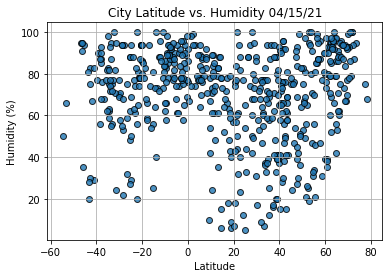

In [14]:
# Build the scatter plot for latitude and humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

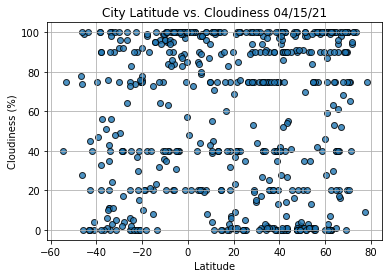

In [15]:
# Build the scatter plot for latitude and cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

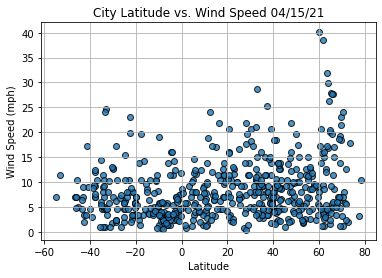

In [16]:
# Build the scatter plot for latitude and wind_speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data. 
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values =  x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]
index13

City                    Upernavik
Country                        GL
Date          2021-04-15 20:22:48
Lat                       72.7868
Lng                      -56.1549
Max Temp                    -3.75
Humidity                       87
Cloudiness                    100
Wind Speed                   1.95
Name: 13, dtype: object

In [33]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
558     True
559    False
560     True
561     True
562     True
Name: Lat, Length: 563, dtype: bool

In [34]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Jamestown,US,2021-04-15 20:18:42,42.0970,-79.2353,44.01,56,90,13.80
5,Half Moon Bay,US,2021-04-15 20:22:46,37.4636,-122.4286,66.99,71,1,8.05
6,Sangueya,GN,2021-04-15 20:22:47,10.7000,-14.3667,79.32,73,39,3.74
8,Hamilton,US,2021-04-15 20:22:07,39.1834,-84.5333,55.40,41,75,11.50
13,Upernavik,GL,2021-04-15 20:22:48,72.7868,-56.1549,-3.75,87,100,1.95


In [35]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-04-15 20:22:46,-23.1203,-134.9692,77.94,74,74,7.94
1,Hobart,AU,2021-04-15 20:19:11,-42.8794,147.3294,42.80,75,20,6.91
3,Mahebourg,MU,2021-04-15 20:22:25,-20.4081,57.7000,77.00,94,75,5.75
4,Aripuana,BR,2021-04-15 20:19:43,-9.1667,-60.6333,80.96,90,95,0.85
7,Flinders,AU,2021-04-15 20:22:47,-34.5833,150.8552,55.99,62,43,4.61


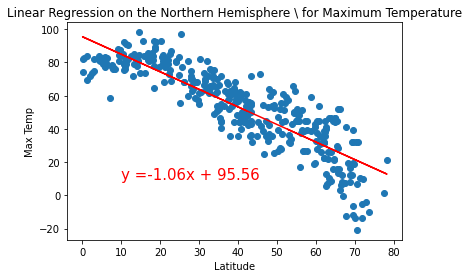

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (10,10))


In [51]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = -1.06x + 95.56
The r-value is: -0.873


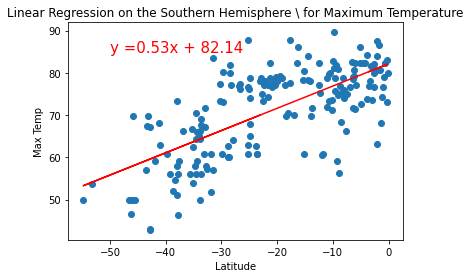

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,85))

In [52]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.53x + 82.14
The r-value is: 0.690


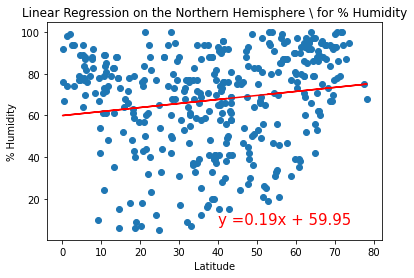

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity', (40,8))


In [66]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.19x + 59.95
The r-value is: 0.164


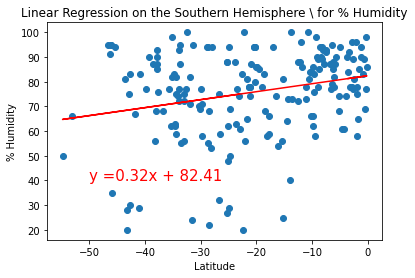

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,40))

In [67]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.32x + 82.41
The r-value is: 0.246


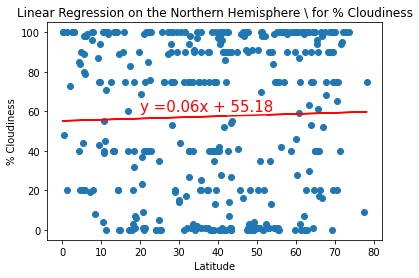

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \ for % Cloudiness', '% Cloudiness', (20,60))


In [76]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.06x + 55.18
The r-value is: 0.030


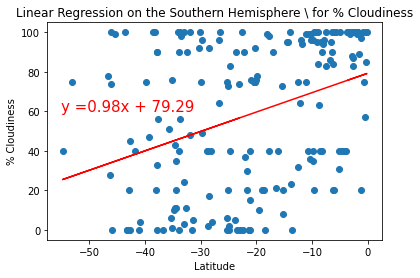

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness',(-55,60))

In [79]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.98x + 79.29
The r-value is: 0.358


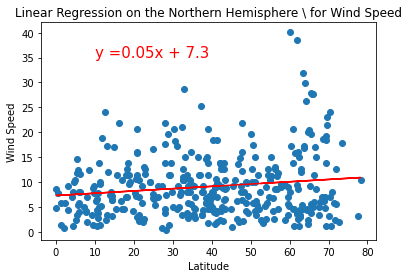

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed', (10,35))


In [83]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.05x + 7.3
The r-value is: 0.149


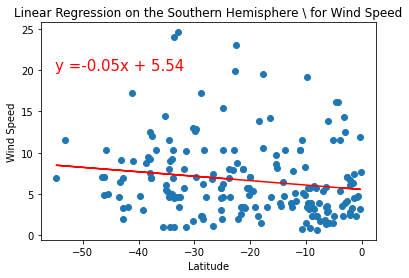

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed',(-55,20))

In [87]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
# Get the equation of the line
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = -0.05x + 5.54
The r-value is: -0.160
